In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.stats import norm
import BDATools as BDA
from get_data import df
import scipy.stats as ss

%matplotlib inline

def setup_hist(vals, ax, nbins=30):
    ax.hist(vals, nbins, normed=True, histtype="step")
    ax.hist(vals, nbins, normed=True, color="b", histtype="stepfilled",
            alpha=0.2)
    return ax

In [10]:
lnW10 = np.log(df.W10[np.isfinite(df.W10)])
W10 = df.W10[np.isfinite(df.W10)]

In [44]:
shape, loc, scale = ss.lognorm.fit(W10, floc=0)
print "loc={}, scale={}".format(np.log(scale), shape)

loc=-3.33339544918, scale=0.792871316119


loc=-3.33339544918, scale=0.792871316119


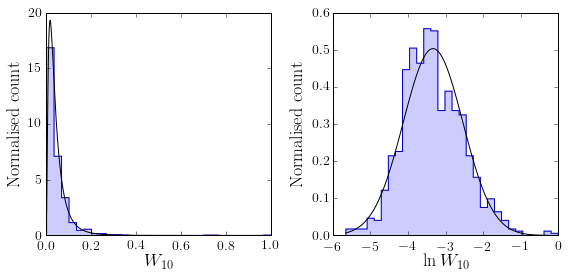

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

quants = np.linspace(W10.min(), W10.max(), 500)
ax1.plot(quants, ss.lognorm.pdf(quants, shape, loc, scale))
ax1 = setup_hist(W10, ax1, 30)
ax1.set_xlabel("$W_{10}$")
ax1.set_ylabel("Normalised count")
                               
lnquants = np.linspace(lnW10.min(), lnW10.max(), 100)
ax2.plot(lnquants, ss.norm.pdf(lnquants, loc=np.log(scale), scale=shape))
ax2 = setup_hist(lnW10, ax2, 30)
ax2.set_xlabel("$\ln W_{10}$")
ax2.set_ylabel("Normalised count")
                               
fig.tight_layout()
plt.savefig("lnW10_distribution.pdf")